<a href="https://colab.research.google.com/github/aryan-553/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns # interactive visualization library built on top on matplotlib

#uploaded these files in the current session of the  colab
#so everytime i open the nb i will have to upload it or else i could have used import os
df1 = pd.read_csv('train.csv') # importing training data

In [4]:
df1.head() #checking the head of the data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
#Missing Values If Any
df1.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
print(len(df1[df1.label == 0]), 'Non-Hatred Tweets')
print(len(df1[df1.label == 1]), 'Hatred Tweets')
# Class distribution in this data seems to be imbalanced.
# F1 score should be used fot model performance evaluation in such situation. 

29720 Non-Hatred Tweets
2242 Hatred Tweets


# **PREPROCESSING**

In [7]:
#importing different libraries for analysis, processing and classification
import nltk
nltk.download('all') #needed only if you dont have the nltk files, my pc didn't so i had add this later
from sklearn import re #regular expression for text processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 
# vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score # performance evaluation criteria

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

# **PREPROCESSING TWEEET COL**

In [9]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets


In [10]:
df1['normalized_text'] = df1.tweet.apply(normalizer)

**Extracting words with # for further analysis**

In [11]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [12]:
df1['hashtag'] = df1.tweet.apply(extract_hashtag)

In [13]:
df1.head()

,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


# **CREATING WORD CLOUD**

In [14]:
# all tweets 
all_words = " ".join(df1.normalized_text)
#print(all_all_words)

In [15]:
#Hatred tweets
hatred_words = " ".join(df1[df1['label']==1].normalized_text)
#print(hatred_words)
#Positive tweets
pos_words = " ".join(df1[df1['label']==0].normalized_text)

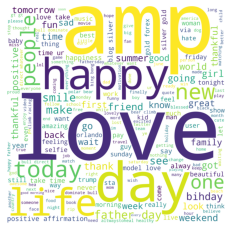

In [16]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**NEGATIVE TWEET WORD CLOUD**

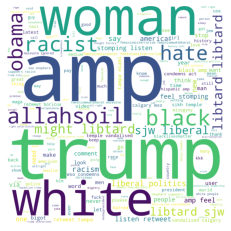

In [17]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(hatred_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**POSITIVE TWEET WORD CLOUD**

In [ ]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(pos_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **ANALYZING # WORDS**

In [18]:
freq_all_hashtag = FreqDist(list((" ".join(df1.hashtag)).split())).most_common(10)
freq_all_hashtag

[('love', 1591),
 ('positive', 879),
 ('smile', 577),
 ('healthy', 576),
 ('thankful', 471),
 ('fun', 463),
 ('life', 438),
 ('summer', 392),
 ('model', 366),
 ('cute', 364)]

In [19]:
freq_hatred_hashtag = FreqDist(list((" ".join(df1[df1['label']==1]['hashtag'])).split())).most_common(10)
freq_hatred_hashtag

[('trump', 134),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 32)]

In [20]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
df_hatredhashtag = pd.DataFrame(freq_hatred_hashtag, columns=['words', 'frequency'])
print(df_allhashtag.head())
print(df_hatredhashtag.head())

      words  frequency
0      love       1591
1  positive        879
2     smile        577
3   healthy        576
4  thankful        471
       words  frequency
0      trump        134
1   politics         95
2  allahsoil         92
3    libtard         76
4    liberal         75


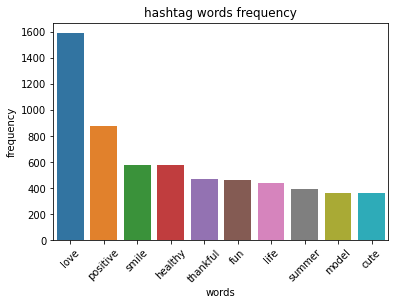

In [21]:
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

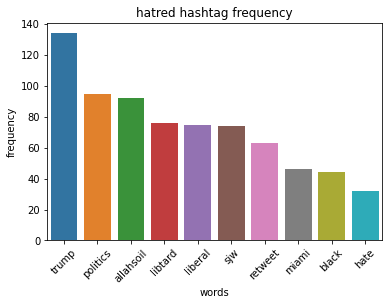

In [22]:
sns.barplot(x='words', y='frequency', data=df_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('hatred hashtag frequency')
plt.show()

In [23]:
# to create sparse matrix corpus is created to pass to vectorizer
len(df1)
corpus = []
for i in range(0,31962):
    corpus.append(df1['normalized_text'][i])
#corpus

In [24]:
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [25]:
# creating dense matrix
X = cv.transform(corpus).toarray()
y = df1.iloc[:,1].values

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# **LOGISTIC REGRESSION CLASSIFICATION** 

In [ ]:
classifier1 = LogisticRegression(C=10)
classifier1.fit(X_train, y_train)


In [ ]:
y_pred = classifier1.predict(X_test)
y_prob = classifier1.predict_proba(X_test)

In [ ]:
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10, stop_words=stopwords.words('english'))
X1 = tfidf.fit_transform(corpus)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=42)
classifier2 = LogisticRegression(C=10)
classifier2.fit(X1_train, y1_train)

In [ ]:
y1_pred = classifier2.predict(X1_test)
y1_prob = classifier2.predict_proba(X1_test)

In [ ]:
print(f1_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

In [ ]:
threshold = np.arange(0.1,0.9,0.1)
score = [f1_score(y1_test, ((y1_prob[:,1] >= x).astype(int))) for x in threshold]

In [ ]:
plt.plot(threshold, score)
plt.xlabel('Threshold Probability')
plt.ylabel('F1 score')
plt.show()

**PERFORMING CLASSIFICATION MODEL ON TEST DATA**

In [ ]:
df2 = pd.read_csv('test.csv')
df2.head()

In [ ]:
df2['normalized_text'] = df2['tweet'].apply(normalizer)

In [ ]:
# creating corpus
corpus_test = []
for i in range(0,17197):
    corpus_test.append(df2.normalized_text[i])
#corpus_test

In [ ]:
Test_X = tfidf.transform(corpus_test)

In [ ]:
pred_Y = classifier2.predict(Test_X)
prob_Y = classifier2.predict_proba(Test_X)

In [ ]:
df2['pred_label'] = pred_Y
scores = (prob_Y[:,1] >= 0.5).astype(int)
df2['score'] = scores

In [ ]:
df2[df2.pred_label == 1]